In [150]:
import numpy as np
from scipy.stats import binom, beta
from scipy import stats
import matplotlib.pyplot as plt
from math import comb

*ESTADISTICA BAYESIANA*

In [122]:
np.random.seed(172)
p = 0.3
n = 10
tiradas = np.random.binomial(1,p,n)

In [123]:
def binom_likelihood(p,tiradas):
    n_caras = np.sum(tiradas)
    largo = len(tiradas)
    return binom.pmf(n_caras, largo,p)

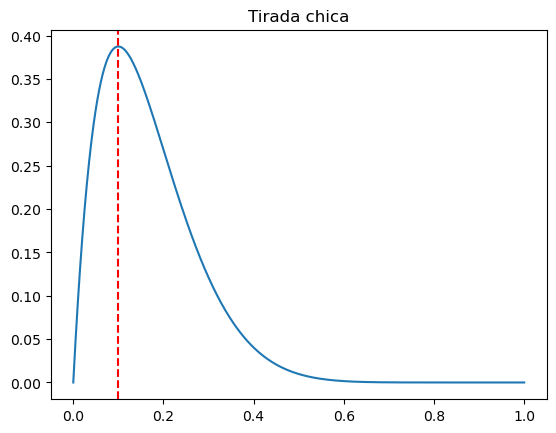

In [124]:
p_estimada = np.linspace(0,1,1000)
likelihood = np.array([binom_likelihood(p, tiradas) for p in p_estimada])

fig, ax = plt.subplots()
ax.plot(p_estimada,likelihood)
ax.axvline(x=sum(tiradas)/len(tiradas), linestyle="--", color = "red")
plt.title("Tirada chica")
plt.show()

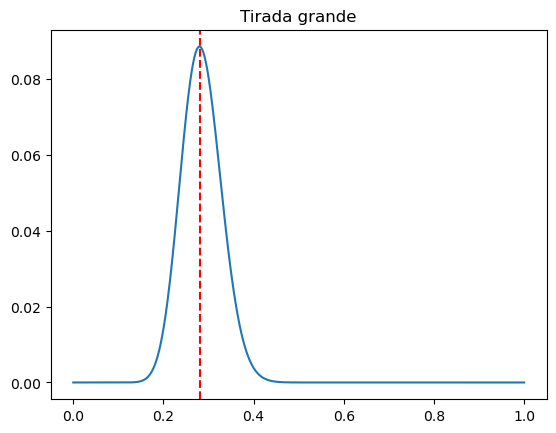

In [125]:
tiradas = np.random.binomial(1,p,n*10)
likelihood = np.array([binom_likelihood(p, tiradas) for p in p_estimada])

fig, ax = plt.subplots()
ax.plot(p_estimada,likelihood)
ax.axvline(x=sum(tiradas)/len(tiradas), linestyle="--", color = "red")
plt.title("Tirada grande")
plt.show()

In [126]:
def uniform_prior(p):
    return 1

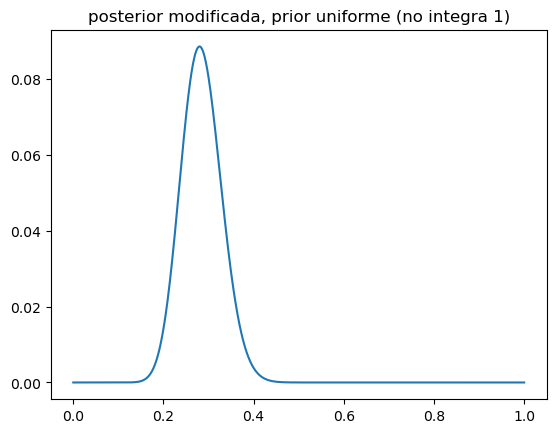

In [127]:
prior = uniform_prior(p)

def posterior_modificada(p):
    return binom_likelihood(p,tiradas) * prior

p = np.linspace(0,1,1000)
fig, ax = plt.subplots()
ax.plot(p, [posterior_modificada(_) for _ in p])
plt.title("posterior modificada, prior uniforme (no integra 1)")
plt.show()

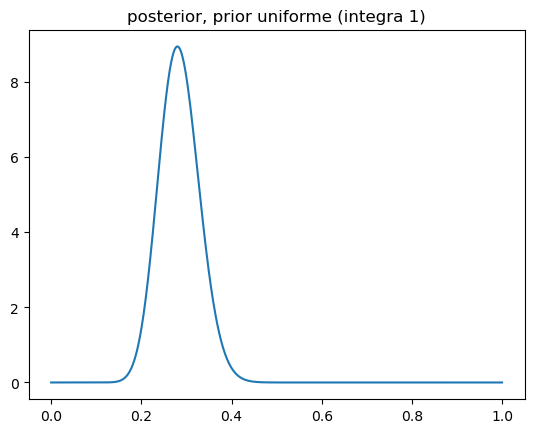

In [128]:
constante_normalizacion = sum(posterior_modificada(_) for _ in p) * np.diff(p)[0]

def posterior(p):
    return posterior_modificada(p) / constante_normalizacion

p = np.linspace(0,1,1000)
fig, ax = plt.subplots()
ax.plot(p, [posterior(_) for _ in p])
plt.title("posterior, prior uniforme (integra 1)")
plt.show()

In [129]:
def other_prior(p):
    if p < 0.5:
        return 0
    return 2
def posterior_modificada1(p):
    return binom_likelihood(p,tiradas) * other_prior(p)
constante_normalizacion = sum(posterior_modificada1(_) for _ in p) * np.diff(p)[0]
def posterior1(p):
    return posterior_modificada1(p) / constante_normalizacion

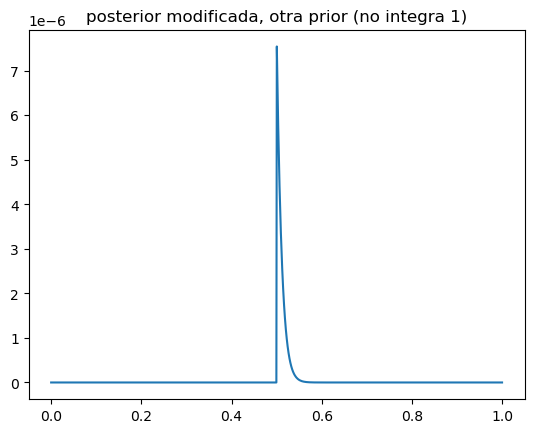

In [130]:
fig, ax = plt.subplots()
ax.plot(p, [posterior_modificada1(_) for _ in p])
plt.title("posterior modificada, otra prior (no integra 1)")
plt.show()

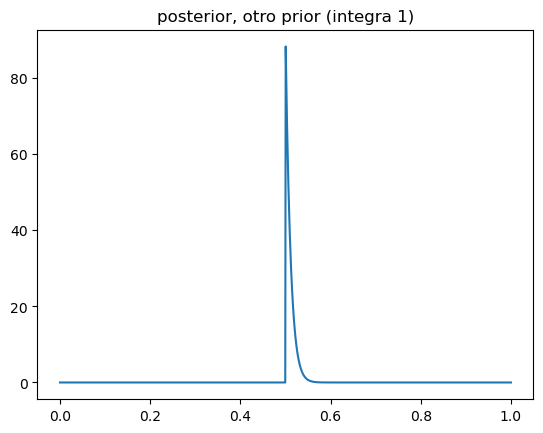

In [131]:
fig, ax = plt.subplots()
ax.plot(p, [posterior1(_) for _ in p])
plt.title("posterior, otro prior (integra 1)")
plt.show()

In [132]:
def other_other_prior(p):
    if p > 0.5:
        return 0
    return 2
def posterior_modificada2(p):
    return binom_likelihood(p,tiradas) * other_other_prior(p)
constante_normalizacion = sum(posterior_modificada2(_) for _ in p) * np.diff(p)[0]
def posterior2(p):
    return posterior_modificada2(p) / constante_normalizacion

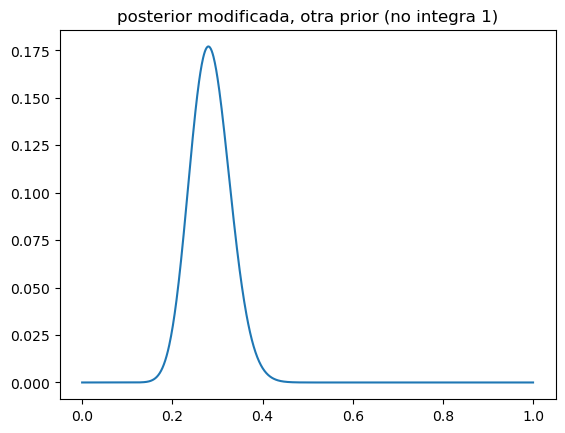

In [133]:
fig, ax = plt.subplots()
ax.plot(p, [posterior_modificada2(_) for _ in p])
plt.title("posterior modificada, otra prior (no integra 1)")
plt.show()

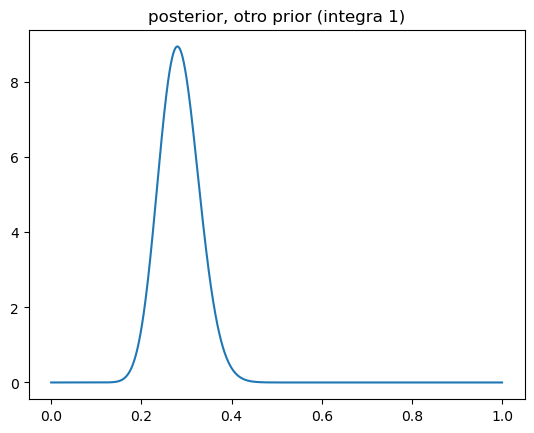

In [134]:
fig, ax = plt.subplots()
ax.plot(p, [posterior2(_) for _ in p])
plt.title("posterior, otro prior (integra 1)")
plt.show()

*BAYES BINOMIAL*

In [137]:
p = 0.485
N = 1000

nacimientos = np.random.binomial(1,p,N)

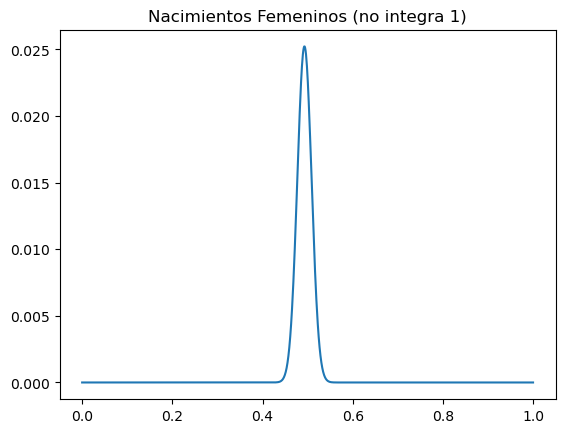

In [138]:
prior = uniform_prior(p)

def posterior_modificada(p):
    return binom_likelihood(p,nacimientos) * prior

p = np.linspace(0,1,1000)
fig, ax = plt.subplots()
ax.plot(p, [posterior_modificada(_) for _ in p])
plt.title("Nacimientos Femeninos (no integra 1)")
plt.show()

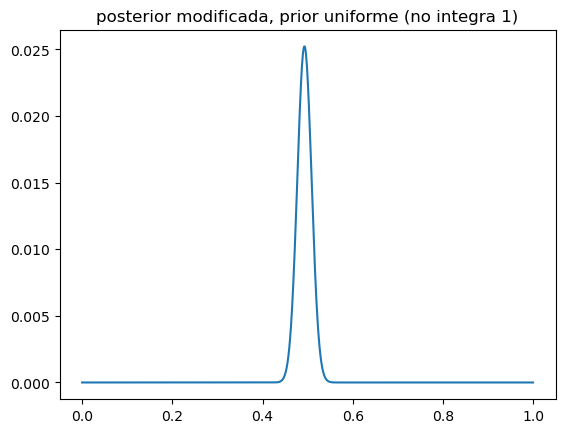

In [139]:
constante_normalizacion = sum(posterior_modificada(_) for _ in p) * np.diff(p)[0]
p = np.linspace(0,1,1000)
fig, ax = plt.subplots()
ax.plot(p, [posterior_modificada(_) for _ in p])
plt.title("posterior modificada, prior uniforme (no integra 1)")
plt.show()

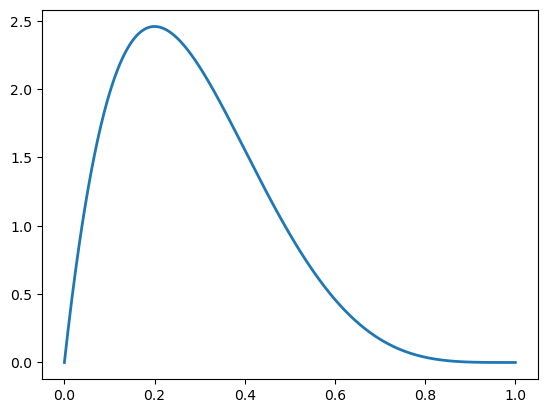

In [141]:
a = 2
b = 5

x = np.linspace(0,1,1000)
pdf = beta.pdf(x,a,b)

plt.plot(x,pdf,lw=2, label = "beta pdf")

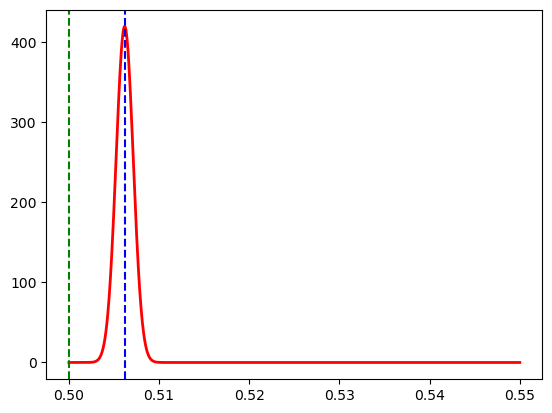

In [148]:
y = 139782 
n = y + 136366

a = y + 1 
b = n - y + 1

x = np.linspace(.5,.55,1000)
pdf = beta.pdf(x,a,b)

fig, ax = plt.subplots()
ax.plot(x,pdf,lw=2,color= "r", label ="Beta pdf")
ax.axvline(x=0.5, color = "g", linestyle="--", label ="linea vertical en .5")
ax.axvline(x=a/(a+b), color = "b", linestyle="--", label = "mean")

plt.show()

*GRID SAMPLING*

In [ ]:
#Binomial 

#likelihood

#data

#prior

In [161]:
trials = 10
draw = stats.binom.rvs(p=0.3, n=10)

print(draw)

2


In [165]:
def prior_uniforme(theta):
    if not 0 <= theta <=1:
        raise ValueError
    return 1

def binomial_likelihood(theta, y, n):
   return comb(n,y) * (theta ** y) * ((1-theta) ** (n-y))

In [166]:
c_posterior_04 = prior_uniforme(0.4) * binomial_likelihood(0.4,draw,trials)
print(c_posterior_04)

0.12093235199999998


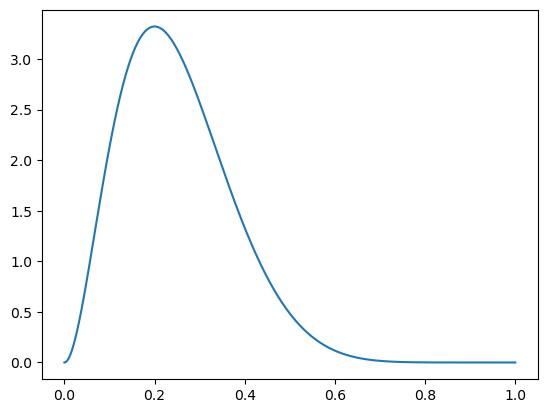

In [181]:
theta_grid = np.linspace(0,1,1000)

def posterior_binomial(theta_grid, draw, trials, prior):
    C_posterior = []

    for theta in theta_grid:
        c_posterior = prior(theta) * binomial_likelihood(theta, draw, trials)
        C_posterior.append(c_posterior)
    
    posterior = C_posterior / sum(C_posterior[:-1]* np.diff(theta_grid)) 
    return np.array(posterior)

post = posterior_binomial(theta_grid, draw, trials, prior_uniforme)
fig, ax = plt.subplots()
ax.plot(theta_grid, post)

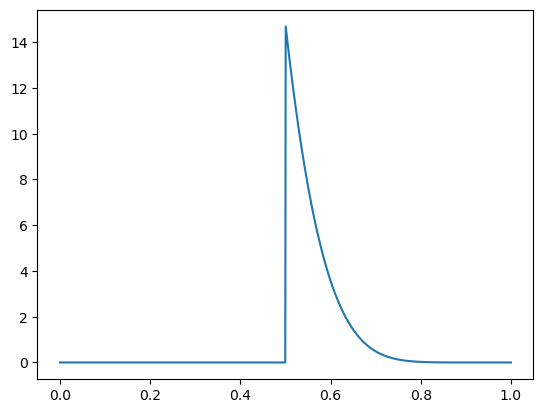

In [184]:
def no_low_prob_prior(theta):
    if theta < 0.5:
        return 0 
    return 2

fig, ax = plt.subplots()
posterior = posterior_binomial(theta_grid, draw, trials, no_low_prob_prior)
ax.plot(theta_grid, posterior)

(0.0, 1.0)

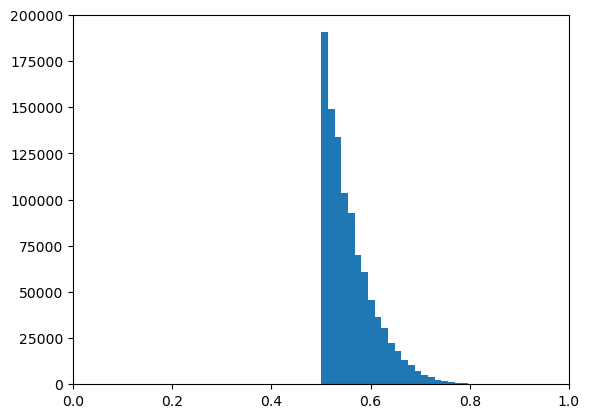

In [191]:
samples = np.random.choice(theta_grid, p=posterior/sum(posterior), size = 1000000)

fig, ax = plt.subplots()
ax.hist(samples, bins = 30)
ax.set_xlim(0,1)

In [192]:
media = np.mean(samples)
mediana = np.median(samples)
q3 = np.quantile(samples, q = 0.75)

(array([ 17.,  40., 115., 227., 238., 194., 107.,  43.,  14.,   5.]),
 array([0.55343443, 0.55443694, 0.55543944, 0.55644194, 0.55744444,
        0.55844695, 0.55944945, 0.56045195, 0.56145445, 0.56245696,
        0.56345946]),
 <BarContainer object of 10 artists>)

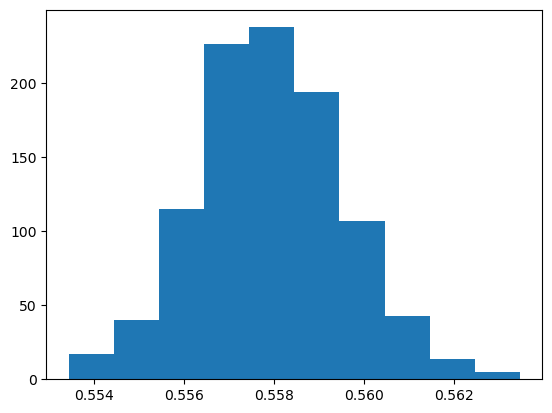

In [193]:
means = []
for i in range (1000):
    samples = np.random.choice(theta_grid, p= posterior/sum(posterior), size= 1000)
    means.append(np.mean(samples))

plt.hist(means)

In [194]:
#prob de que salga cara en la proxima
samples = np.random.choice(theta_grid, p = posterior/sum(posterior), size = 1000)
n_of_heads = np.sum(np.random.random(size= len(samples)) < samples)
p = n_of_heads / len(samples)
print(p)

0.54
